# Product Recommendation System

---
### My Identity
- Name : Robiul Awal
- ID Dicoding : robiul_awal
- Domicile : Yogyakarta
- Email : robbyulawal11@gmail.com
- Linkedin : https://www.linkedin.com/in/robiul-awal11/

---
<h1><center> Product Recommendation System in Amazon Commerce </h1></center>

### Introduction
<p align = "justify"> Amazon is one of the largest and most well-known e-commerce platforms in the world, offering a wide range of products from books, electronics, clothing, to daily necessities. As a global e-commerce company, Amazon has millions of products available to customers in various countries. This very wide product diversity benefits consumers because they have many choices, but also creates challenges for Amazon to help customers find the most relevant products according to their needs and preferences. In this context, the recommendation system becomes very important as a tool to improve the customer shopping experience and optimize sales.

The main problem faced by e-commerce like Amazon is how to present relevant and interesting products to users efficiently. With the large number of products and variations in categories, customers often find it difficult to find the right product amidst the sea of ​​choices available. In addition, the problem of "information overload" or being flooded with information also often arises, where too many choices can make it difficult for customers to make decisions. Another challenge is the "cold start" or the difficulty of providing accurate recommendations for new products or new users who have not had much interaction on the platform. These challenges require a system that can filter, prioritize, and present the most relevant products to each user.

Recommender systems have emerged as an effective solution to address these issues by providing personalized product suggestions based on user data, such as search history, purchases, and product ratings. Amazon implements several approaches in its recommendation system, including content-based and collaborative recommendations. The content-based method uses product attribute data and user preferences to match products to the user’s interests. Meanwhile, the collaborative method leverages behavioral patterns from other users with similar preferences to suggest products that might be of interest. By combining these two approaches, Amazon can provide more accurate and tailored recommendations to the user’s needs.

### Objective
<p align = "justify"> Generate a number of personalized product recommendations for users with content-based filtering techniques.
<p align = "justify"> Generate a number of product recommendations that match user preferences and have never been purchased before with collaborative filtering techniques.

### Dataset
<p align = "justify"> This first dataset consists of an extensive collection of over 2 million customer reviews and ratings for beauty-related products available on the Amazon platform. The dataset includes key information such as:

- Unique User ID for customer identification.
- Product ASIN (Amazon’s unique product identifier).
- Rating, which reflects customer satisfaction on a scale of 1 to 5.
- Timestamp, recorded in UNIX time, indicating when the rating was submitted.

This dataset is just a small part of Amazon’s vast product dataset, which includes 142.8 million reviews spanning the period from May 1996 to July 2014. The full dataset provides a wealth of information, including detailed product reviews, metadata, category information, pricing data, brand details, and even image features.

With the second dataset, you can get an in-depth look at which products are selling the best, which SEO titles are generating the most sales, the best price range for a product in a particular category, and much more.

This dataset consists of two datasets, amazon_products.csv and amazon_categories.csv. These two datasets can be linked through a foreign key relationship where the ‘category_id’ column in ‘amazon_products’ refers to the ‘id’ column in ‘amazon_categories’, allowing us to link each product to the appropriate category.

The large dataset contains 1.4 million Amazon products. Including titles, number of reviews, ratings, prices, and sales data from September 2023.

### Process
- <p align = "justify"> Data Collection: Data collection was done by downloading the dataset from the official reference source from Kaggle, namely at the following link https://www.kaggle.com/datasets/ahmedaliraja/customer-rating-data-by-amazon dan https://www.kaggle.com/datasets/asaniczka/amazon-products-dataset-2023-1-4m-products
- <p align = "justify"> Data Understanding: Data Understanding is the initial stage of a project to understand the data we have. In this case, we have 3 separate files regarding ratings, products, and categories
- <p align = "justify"> Univariate Exploratory Data Analysis: At this stage, analysis and exploration of each variable in the data are carried out. In addition, further exploration is also carried out regarding the relationship between one variable and another.
- <p align = "justify"> Data Preprocessing: This is the data preparation stage before the data is used for the next process. At this stage, several files are merged so that they become one complete file unit and are ready to be used in the modeling stage.
- <p align = "justify"> Data Preparation: At this stage, data preparation is carried out and several techniques are carried out such as overcoming missing values. In the content-based recommendation system (content-based filtering) that was developed, one product represents one product category.
- <p align = "justify"> Model Development with Content Based Filtering: At this stage, a recommendation system is developed with the content-based filtering technique. The content-based filtering technique will recommend items that are similar to items that users have liked in the past. At this stage, important feature representations of each product category are found with the tfidf vectorizer and the similarity level is calculated with cosine similarity. After that, a number of product recommendations are made for customers based on previously calculated similarities.
- <p align = "justify">Model Development with Collaborative Filtering: At this stage, the system recommends a number of products based on previously given ratings. From user rating data, we will identify similar products that have never been visited by users to recommend.

References
<p align = "justify"> Dwivedi, Rohit & Anand, Abhineet & Johri, Prashant & Banerji, Arpit & Gaur, N. (2020). Product Based Recommendation System On Amazon Data.
<p align = "justify"> Ahmed, Md Zaid & Singh, Abhay & Paul, Abir & Ghosh, Sayantani & Chaudhuri, Avijit. (2022). Amazon Product Recommendation System. IJARCCE. 11. 10.17148/IJARCCE.2022.11356.

## 1. Importing Packages

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [24]:
# Import library for data preparation
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for modelling with content based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Import library for modelling with collaborative filtering
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 2. Loading Data

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load data from kaggle and then extract it to the storage directory. |

---

In [2]:
!rm -rf amazon_dataset/

In [3]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d asaniczka/amazon-products-dataset-2023-1-4m-products
!unzip amazon-products-dataset-2023-1-4m-products.zip

Dataset URL: https://www.kaggle.com/datasets/asaniczka/amazon-products-dataset-2023-1-4m-products
License(s): ODC Attribution License (ODC-By)
 73% 72.0M/99.2M [00:00<00:00, 265MB/s]
100% 99.2M/99.2M [00:00<00:00, 264MB/s]
Archive:  amazon-products-dataset-2023-1-4m-products.zip
  inflating: amazon_categories.csv   
  inflating: amazon_products.csv     


In [4]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ahmedaliraja/customer-rating-data-by-amazon
!unzip customer-rating-data-by-amazon.zip

Dataset URL: https://www.kaggle.com/datasets/ahmedaliraja/customer-rating-data-by-amazon
License(s): other
 60% 9.00M/15.0M [00:00<00:00, 58.8MB/s]
100% 15.0M/15.0M [00:00<00:00, 86.6MB/s]
Archive:  customer-rating-data-by-amazon.zip
  inflating: customer_ratings_data.csv  


>The data downloaded from Kaggle has two sources, namely customer rating data from one source and another source provides two datasets, namely products and categories data. The process of modeling recommendation systems requires these three datasets and cannot use only one dataset.

## 3. Exploratory Data Analysis (EDA)

---
    
| ⚡ Description: Exploratory Data Analysis ⚡ |
| :--------------------------- |
| These preprocessing steps aim to remove noise, convert text to a consistent format, and extract important features for further analysis. |

---


In [5]:
amazon_categories = pd.read_csv('/content/amazon_categories.csv')
amazon_products = pd.read_csv('/content/amazon_products.csv')
customer_ratings = pd.read_csv('/content/customer_ratings_data.csv')

### Univariate Analysis
Unvariate analysis is performed to determine the distribution of each variable in the dataset. This process produces a visualization that illustrates the comparison of distributions on each variable in the dataset.

#### Amazon Categories Dataset

In [13]:
amazon_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             248 non-null    int64 
 1   category_name  248 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


> Based on the output above, it can be seen that there are 2 variables in amazon_categories. The id variable has an int 64 data type while the category_name variable has an object or character type.

In [15]:
print('Category Products: ', amazon_categories.category_name.unique())

Category Products:  ['Beading & Jewelry Making' 'Fabric Decorating'
 'Knitting & Crochet Supplies' 'Printmaking Supplies'
 'Scrapbooking & Stamping Supplies' 'Sewing Products'
 'Craft & Hobby Fabric' 'Needlework Supplies'
 'Arts, Crafts & Sewing Storage' 'Painting, Drawing & Art Supplies'
 'Craft Supplies & Materials' 'Gift Wrapping Supplies' 'Party Decorations'
 'Automotive Paint & Paint Supplies'
 'Heavy Duty & Commercial Vehicle Equipment' 'Automotive Tires & Wheels'
 'Automotive Tools & Equipment'
 'Automotive Performance Parts & Accessories' 'Car Care' 'Oils & Fluids'
 'Automotive Replacement Parts' 'Lights, Bulbs & Indicators'
 'Automotive Interior Accessories' 'Automotive Exterior Accessories'
 'Automotive Enthusiast Merchandise' 'Car Electronics & Accessories'
 'RV Parts & Accessories' 'Motorcycle & Powersports'
 'Baby Diapering Products' 'Baby & Toddler Feeding Supplies'
 'Pregnancy & Maternity Products' 'Child Safety Car Seats & Accessories'
 'Baby Safety Products' 'Toilet Tr

> Based on the output above, you can see 248 categories in the amazon_categories dataset

In [18]:
amazon_categories.head()

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


#### Amazon Products Dataset

In [14]:
amazon_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB


>- Based on the output above, it can be seen that there are 4 variables of the object data type.
- There are 3 variables of the float64 numeric data type.
- There are 3 variables of the int64 numeric data type.
- And there are a variables of the bool data type.

In [21]:
amazon_products.describe()

,stars,reviews,price,listPrice,category_id,boughtInLastMonth
count,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06
mean,3.999512e+00,1.807508e+02,4.337540e+01,1.244916e+01,1.237409e+02,1.419823e+02
std,1.344292e+00,1.761453e+03,1.302893e+02,4.611198e+01,7.311273e+01,8.362720e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,0.000000e+00
50%,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,0.000000e+00
75%,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,5.000000e+01
max,5.000000e+00,3.465630e+05,1.973181e+04,9.999900e+02,2.700000e+02,1.000000e+05


> Based on the output above, it can be seen that the minimum number of stars a user can give to a product is 0 and the maximum is 5.

In [17]:
amazon_products.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


              jumlah sampel  persentase
isBestSeller                           
False               1417817        99.4
True                   8520         0.6


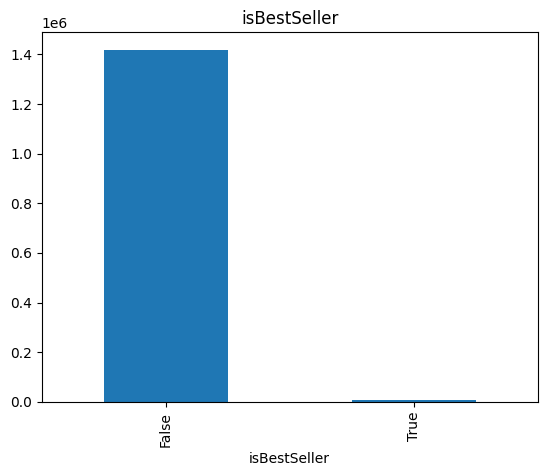

In [8]:
feature = 'isBestSeller'
count = amazon_products[feature].value_counts()
percent = 100*amazon_products[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

> It is known that only around 0.6 percent of products are best sellers.

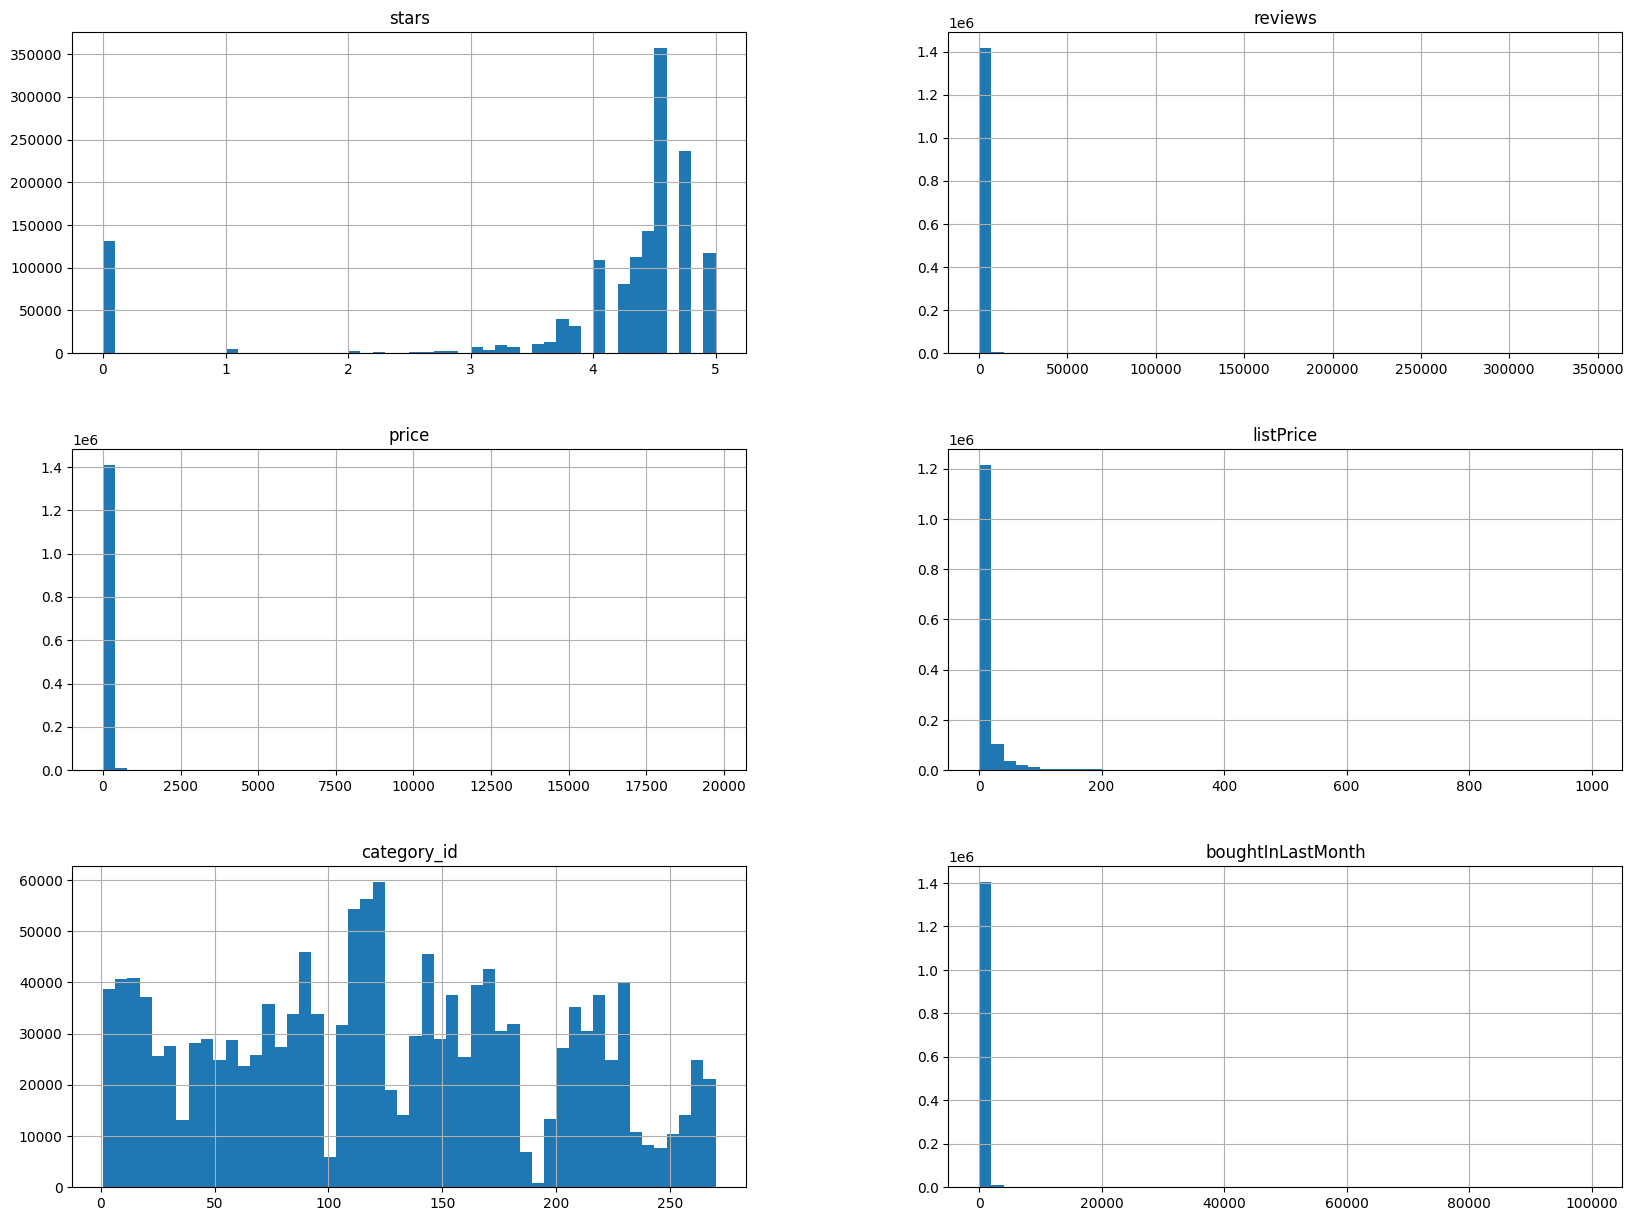

In [7]:
amazon_products.hist(bins=50, figsize=(20,15))
plt.show()

> From the plot above, we can obtain information that the number of products with a rating of around 4.5 is the largest.

#### Amazon Customer Ratings Dataset

In [16]:
print(customer_ratings.shape)

(1048575, 4)


Based on the output above, it can be seen that there are 1048575 records related to rating products sold on Amazon.

In [60]:
customer_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   User Id     1048575 non-null  object
 1   Product Id  1048575 non-null  object
 2   Rating      1048575 non-null  int64 
 3   Time stamp  1048575 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


>- Based on the output above, it can be seen that there are 2 variables of the object data type and there are 2 variables of the int64 numeric data type.

In [20]:
customer_ratings.describe()

,Rating,Time stamp
count,1.048575e+06,1.048575e+06
mean,4.176864e+00,1.345636e+09
std,1.306543e+00,5.567113e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.322438e+09
50%,5.000000e+00,1.362960e+09
75%,5.000000e+00,1.385856e+09
max,5.000000e+00,1.406074e+09


>Based on the output above, it can be seen that the minimum rating given to a product is 1 and the maximum rating given is 5.

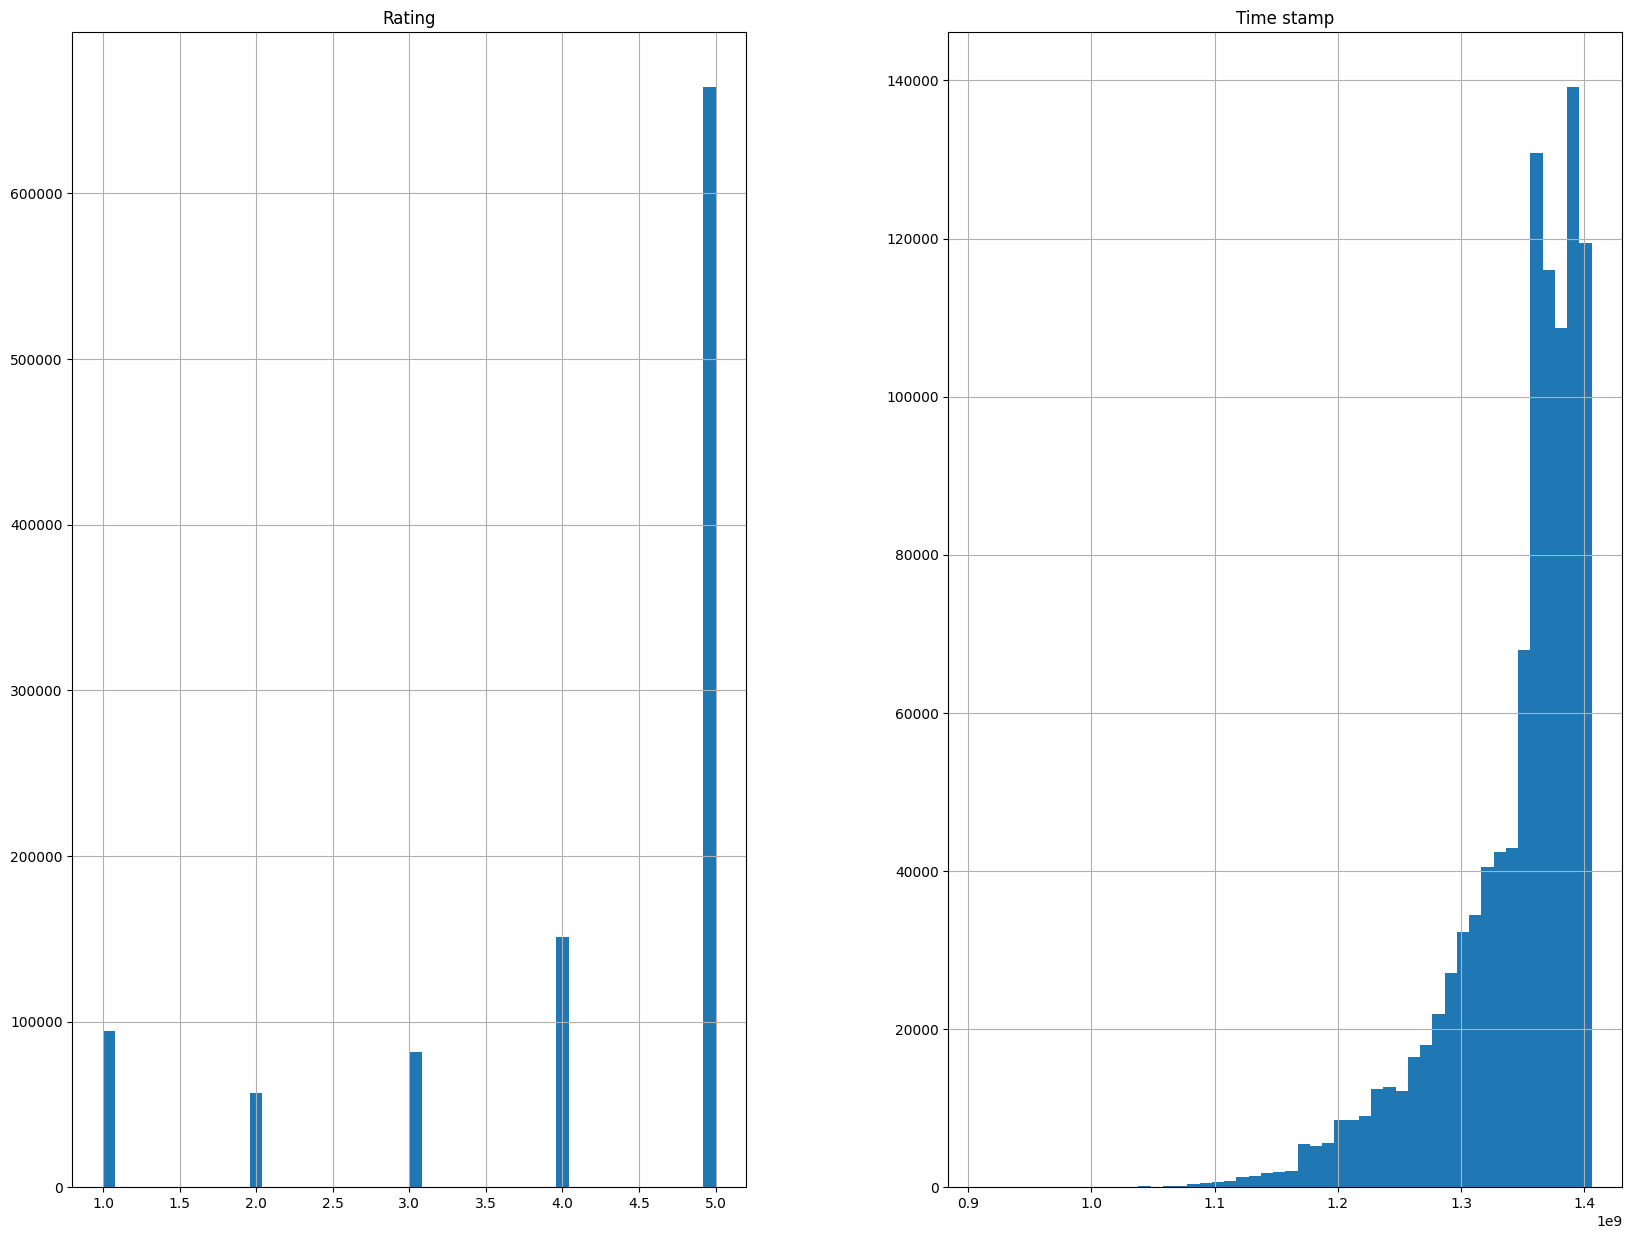

In [10]:
customer_ratings.hist(bins=50, figsize=(20,15))
plt.show()

> Based on the output above, it can be stated that the rating value most frequently given by customers is 5 and the least is 2.

In [23]:
print('Number of product category data on Amazon: ', len(amazon_categories.id.unique()))
print('Number of product data: ', len(amazon_products.asin.unique()))
print('Number of userIDs: ', len(customer_ratings["User Id"].unique()))
print('Number of product data assessed: ', len(customer_ratings["Product Id"].unique()))
print('Total data of all assessments: ', len(customer_ratings))

Jumlah data category product pada amazon:  248
Jumlah data product:  1426337
Jumlah userID:  736653
Jumlah data produk yang dinilai:  97987
Jumlah data semua penilaian:  1048575


### Multivariate Analysis
Multivariate analysis is used to determine the correlation between features and targets, namely the prediction of passenger safety in the Titanic ship accident. In this process, temporary assumptions can be obtained regarding what characteristics have a higher life expectancy in the Titanic ship accident.

#### Data Preprocessing
This is the data preparation stage before the data is used for the next process. At this stage, several files are merged so that they become one complete file unit and are ready to be used in the modeling stage.

>The following is a change in the name of the id column in amazon_categories to category_id so that it is the same as the column name in amazon_products.

In [11]:
amazon_categories= amazon_categories.rename(columns={'id': 'category_id'})

> The following is a merge of amazon_products with amzon_categories based on category_id.

In [12]:
# Menggabungkan dataframe product dengan category berdasarkan nilai category_id
product_info = pd.merge(amazon_products, amazon_categories , on='category_id', how='left')

In [13]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
 11  category_name      1426337 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 121.1+ MB


> handling missing value in product_info dataset

In [14]:
# Check for missing values ​​with the isnull() function
product_info.isnull().sum()

,0
asin,0
title,1
imgUrl,0
productURL,0
stars,0
reviews,0
price,0
listPrice,0
category_id,0
isBestSeller,0


In [15]:
# Membersihkan missing value dengan fungsi dropna()
clean_product_info = product_info.dropna()
clean_product_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426336 entries, 0 to 1426336
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426336 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426336 non-null  object 
 3   productURL         1426336 non-null  object 
 4   stars              1426336 non-null  float64
 5   reviews            1426336 non-null  int64  
 6   price              1426336 non-null  float64
 7   listPrice          1426336 non-null  float64
 8   category_id        1426336 non-null  int64  
 9   isBestSeller       1426336 non-null  bool   
 10  boughtInLastMonth  1426336 non-null  int64  
 11  category_name      1426336 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 131.9+ MB


In [15]:
# Menghitung jumlah rating, product_rating, dan service kemudian menggabungkannya berdasarkan category_id
clean_product_info.groupby('category_id').sum()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,category_name
category_id,,,,,,,,,,,
1,B08YNTXFJGB08DXSF5PZB096JGXQN5B0BZXW1ZGSB0BR8B...,Duufin 120 Pieces Acrylic Keychain Blanks Set ...,https://m.media-amazon.com/images/I/71czFH2QUM...,https://www.amazon.com/dp/B08YNTXFJGhttps://ww...,36050.9,473797,128768.27,34112.82,26,1099750,Beading & Jewelry MakingBeading & Jewelry Maki...
2,B0CB15G8NXB07YYM2NL6B0721PY3M9B01FV60TASB00UY1...,DIY Tie Dye Kit for Kids & Adults - 26 Permane...,https://m.media-amazon.com/images/I/51GQ9Jzp5t...,https://www.amazon.com/dp/B0CB15G8NXhttps://ww...,7530.0,644366,61789.93,6126.77,3,67400,Fabric DecoratingFabric DecoratingFabric Decor...
3,B0C2HB2VF9B0033P75ESB000QHFA02B09B1FPD5GB01JBL...,"Double Pointed Knitting Needles Set, 55pcs/Set...",https://m.media-amazon.com/images/I/61DWdGK0lX...,https://www.amazon.com/dp/B0C2HB2VF9https://ww...,34196.6,1751795,140480.59,28140.36,12,262100,Knitting & Crochet SuppliesKnitting & Crochet ...
4,B003IG27OKB07RSBKDLWB07GYNH35YB0BLYY563FB09Q5N...,Speedball Block Printing Baren - Comfortable W...,https://m.media-amazon.com/images/I/71u+819tqT...,https://www.amazon.com/dp/B003IG27OKhttps://ww...,19590.2,791997,448590.91,61678.04,11,145050,Printmaking SuppliesPrintmaking SuppliesPrintm...
5,B07Y73ZNYGB09D72MCYKB07Q1NGPV9B07STGLY6JB001A4...,8 Colors Rainbow Washable Large Ink Pads for R...,https://m.media-amazon.com/images/I/81uGh4Y56P...,https://www.amazon.com/dp/B07Y73ZNYGhttps://ww...,25943.9,0,91264.75,22437.74,22,500500,Scrapbooking & Stamping SuppliesScrapbooking &...
...,...,...,...,...,...,...,...,...,...,...,...
262,B00F4CFCXOB0C6NPMVG7B0CFZX18S9B08WNJF95YB0CGM9...,$70 Xbox Gift Card [Digital Code]Madden NFL 24...,https://m.media-amazon.com/images/I/61m6wDi1SY...,https://www.amazon.com/dp/B00F4CFCXOhttps://ww...,10922.4,0,144835.21,26850.41,4,42300,"Xbox Series X & S Consoles, Games & Accessorie..."
263,B085TRCCT6B07RZ74VLRB07RX6FBFRB0BCCYLB13B07RZ7...,Luna+Roblox Digital Gift Code for 800 Robux [R...,https://m.media-amazon.com/images/I/11U-TWI08g...,https://www.amazon.com/dp/B085TRCCT6https://ww...,20023.2,0,285539.80,76623.52,6,36850,PC Games & AccessoriesPC Games & AccessoriesPC...
264,B09255QZZ4B071ZRMNTKB01N38AWEDB092561GD4B0BFG3...,baby-girls 8-pack Short Sleeve Onesies Bodysui...,https://m.media-amazon.com/images/I/91dtFAODlW...,https://www.amazon.com/dp/B09255QZZ4https://ww...,11013.8,0,58519.16,12676.69,36,88900,Baby Girls' Clothing & ShoesBaby Girls' Clothi...


In [16]:
# Definisikan dataframe rating ke dalam variabel all_product_rate
all_product_rate = customer_ratings
all_product_rate

,User Id,Product Id,Rating,Time stamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200
...,...,...,...,...
1048570,A31P1LMEXJ8MML,B003H897AQ,1,1334448000
1048571,A6U8SW1MFX122,B003H897AQ,4,1361404800
1048572,A2ND0PP8HY7KBE,B003H897AQ,1,1372464000
1048573,AC9W044EAHP8P,B003H897AQ,1,1392768000


>The following is a change in the name of the Product Id column in clean_product_info to product_id.

In [17]:
clean_product_info = clean_product_info.rename(columns = {'asin':'product_id', 'title':'product_name'})

In [18]:
clean_product_info.head()

,product_id,product_name,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,Suitcases


>The following is a change in the name of the Product Id column in all_product_rate to product_id so that it is the same as the column name in amazon_products.

In [18]:
all_product_rate = all_product_rate.rename(columns = {'Product Id':'product_id'})

In [20]:
all_product_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   User Id     1048575 non-null  object
 1   product_id  1048575 non-null  object
 2   Rating      1048575 non-null  int64 
 3   Time stamp  1048575 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


In [21]:
common_product_ids = all_product_rate['product_id'].isin(clean_product_info['product_id'])
print(common_product_ids.any())

True


> The following is a merge of clean_product_info with all_product_rate based on product_id.

In [26]:
# Menggabungkan data hanya untuk 'product_id' yang cocok
final_data = pd.merge(
    all_product_rate,
    clean_product_info,
    on='product_id',
    how='left'
)

In [19]:
# Menggabungkan data hanya untuk 'product_id' yang cocok
all_product = pd.merge(
    all_product_rate,
    clean_product_info[['product_id', 'product_name', 'category_id', 'category_name']],
    on='product_id',
    how='left'
)

# Menampilkan DataFrame yang sudah digabungkan
all_product

,User Id,product_id,Rating,Time stamp,product_name,category_id,category_name
0,A39HTATAQ9V7YF,205616461,5,1369699200,NaN,NaN,NaN
1,A3JM6GV9MNOF9X,558925278,3,1355443200,NaN,NaN,NaN
2,A1Z513UWSAAO0F,558925278,5,1404691200,NaN,NaN,NaN
3,A1WMRR494NWEWV,733001998,4,1382572800,NaN,NaN,NaN
4,A3IAAVS479H7M7,737104473,1,1274227200,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1048570,A31P1LMEXJ8MML,B003H897AQ,1,1334448000,NaN,NaN,NaN
1048571,A6U8SW1MFX122,B003H897AQ,4,1361404800,NaN,NaN,NaN
1048572,A2ND0PP8HY7KBE,B003H897AQ,1,1372464000,NaN,NaN,NaN
1048573,AC9W044EAHP8P,B003H897AQ,1,1392768000,NaN,NaN,NaN


#### Data Visualization

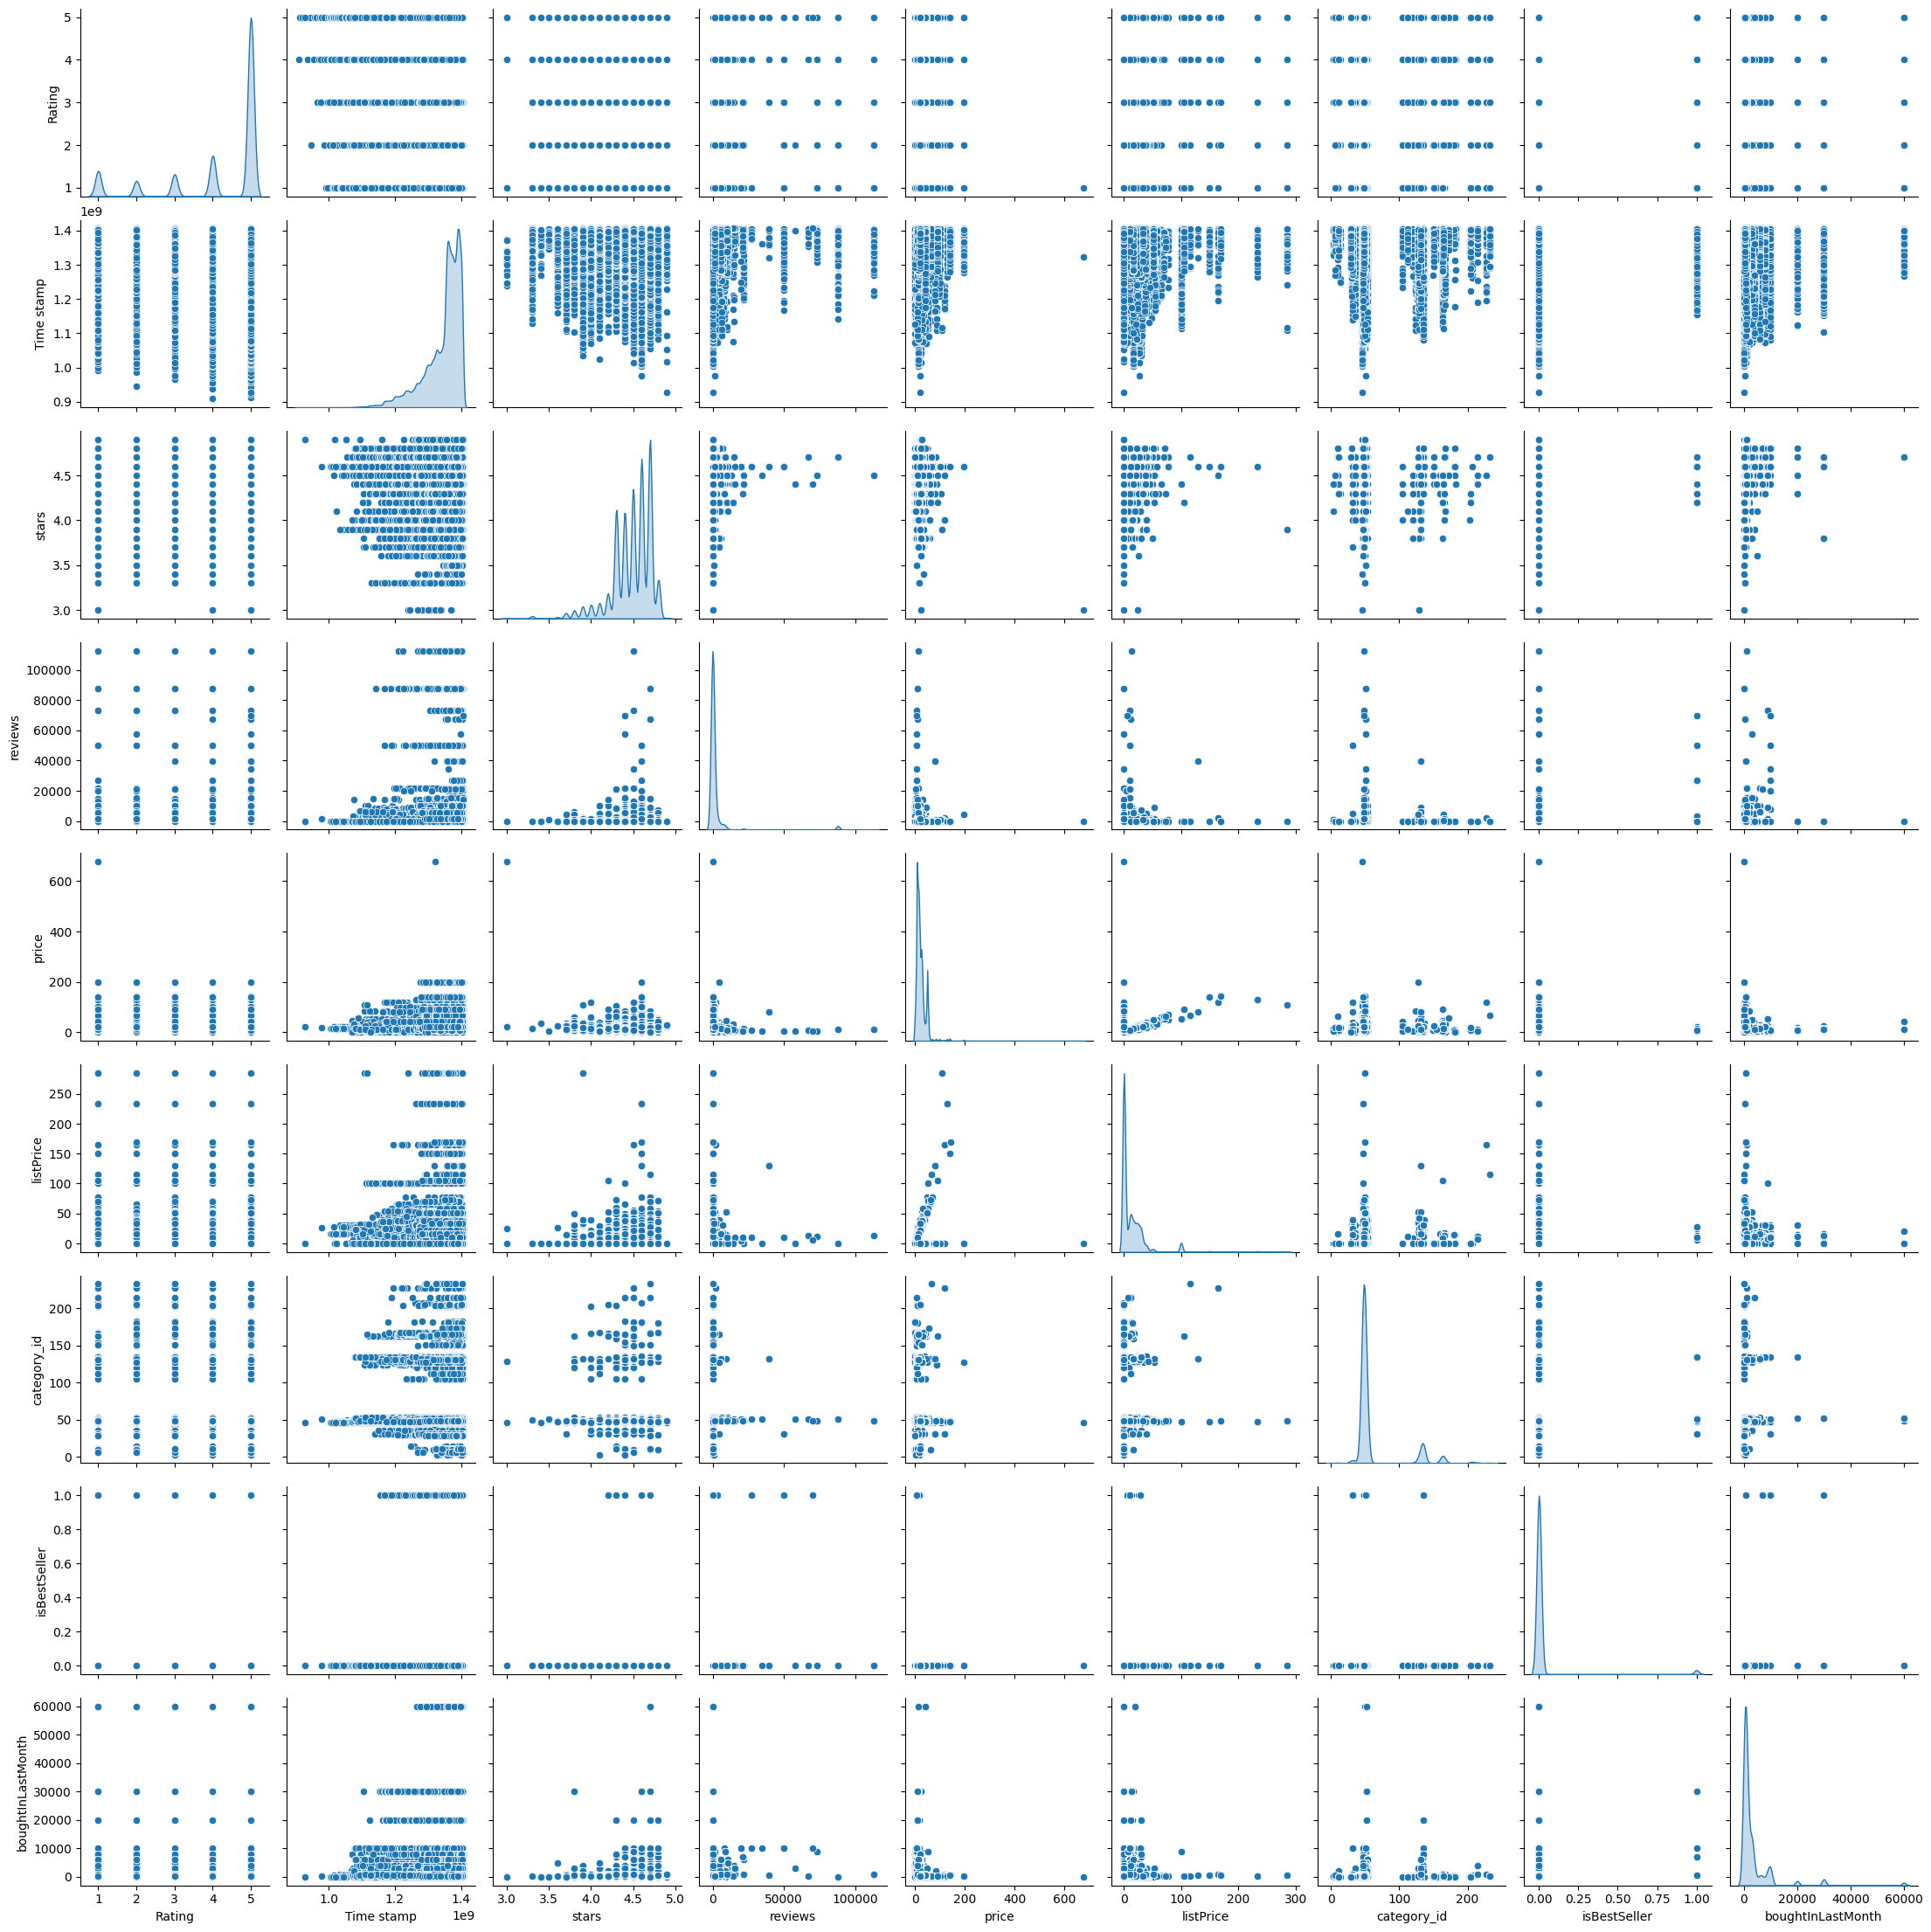

In [28]:
sns.pairplot(final_data, diag_kind = 'kde')

> From the image above, it can be seen that each variable has a random correlation with other variables, except for the price variable with the list price which shows a slight positive correlation between the two variables.

In [30]:
numerical_features_product = ['Rating', 'Time stamp', 'stars', 'reviews', 'price', 'listPrice', 'category_id', 'isBestSeller', 'boughtInLastMonth']

Text(0.5, 1.0, 'Correlation Matrix')

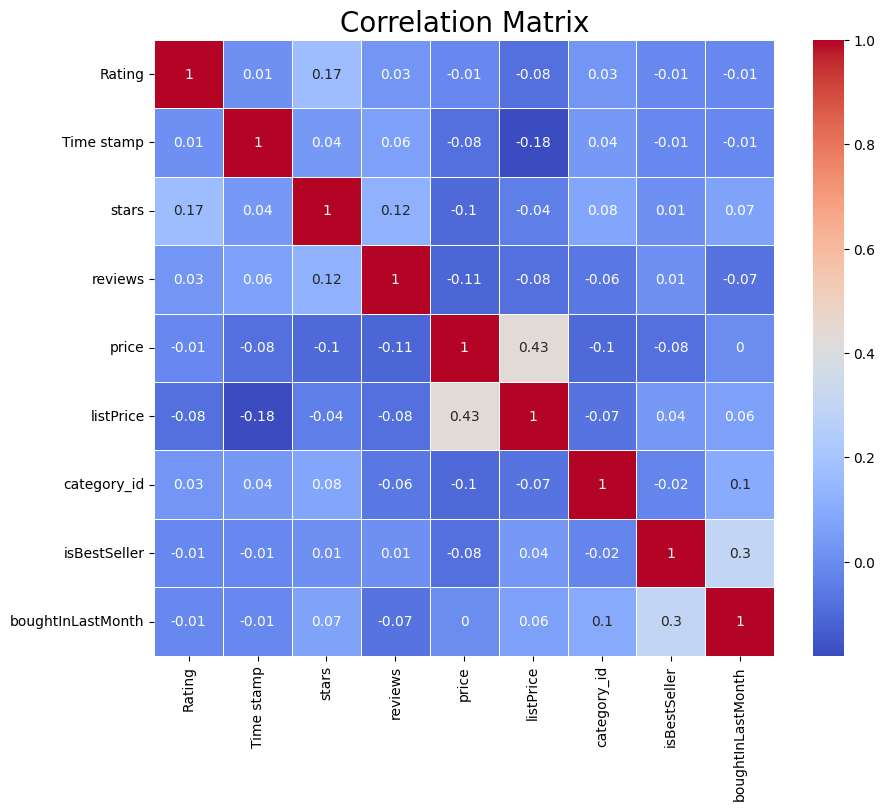

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = final_data[numerical_features_product].corr().round(2)

# To print the value in the box, use the not=True parameter
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

> In line with the results of the correlation of each numeric variable above, the highest correlation is found in the correlation between price and list price of 0.43. However, other variables appear to have very weak correlations, even most of them have correlation values ​​close to 0.

# Content Based Filtering

## 4. Data Preparation

---
    
| ⚡ Description: Data preparation ⚡ |
| :--------------------------- |
| These preparation steps aim handling missing values, handling duplicate values, and feature encoding. |

---

### Handling Missing Values
>After analyzing the variables, it is necessary to clean the dataset so that it can be processed properly. In this project, cleaning will be carried out on several variables. The first will be the deletion of rows that have empty data on the product_name, category_id, and category_name variables.

In [20]:
# Mengecek missing value pada dataframe all_product
all_product.isnull().sum()

,0
User Id,0
product_id,0
Rating,0
Time stamp,0
product_name,943067
category_id,943067
category_name,943067


In [21]:
# Membersihkan missing value dengan fungsi dropna()
all_product_clean = all_product.dropna()
all_product_clean

,User Id,product_id,Rating,Time stamp,product_name,category_id,category_name
2185,A2GWFNKXW7REGE,9790801491,1,1322179200,"Kohler K-22060-BL Graze Kitchen Sink Faucet, M...",46.0,Perfumes & Fragrances
2261,A1YZWN3RF31KH5,B000001SH8,4,1178409600,Women at an Exposition: Music Composed by Wome...,46.0,Perfumes & Fragrances
2262,A94WMDYX093LJ,B000001SH8,5,1384992000,Women at an Exposition: Music Composed by Wome...,46.0,Perfumes & Fragrances
2413,A17216MX43G50E,B000026BTH,5,1053648000,El Cant De La Sibil-La,46.0,Perfumes & Fragrances
2414,A1K7L9Y7IMKJGO,B000026BTH,5,1355702400,El Cant De La Sibil-La,46.0,Perfumes & Fragrances
...,...,...,...,...,...,...,...
1047221,A30AJPNN1K8BXJ,B003H2MR2W,2,1369958400,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047222,AMM12QMTBUD5X,B003H2MR2W,5,1389657600,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047223,AFKNL6WNXFGOM,B003H2MR2W,1,1372723200,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047224,A1AVBZAPZ048UN,B003H2MR2W,4,1378166400,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup


In [28]:
# Mengecek kembali missing value pada variabel all_product_clean
all_product_clean.isnull().sum()

,0
User Id,0
product_id,0
Rating,0
Time stamp,0
product_name,0
category_id,0
category_name,0


In [22]:
# Mengurutkan product berdasarkan PlaceID kemudian memasukkannya ke dalam variabel fix_product
fix_product = all_product_clean.sort_values('product_id', ascending=True)
fix_product

,User Id,product_id,Rating,Time stamp,product_name,category_id,category_name
2185,A2GWFNKXW7REGE,9790801491,1,1322179200,"Kohler K-22060-BL Graze Kitchen Sink Faucet, M...",46.0,Perfumes & Fragrances
2261,A1YZWN3RF31KH5,B000001SH8,4,1178409600,Women at an Exposition: Music Composed by Wome...,46.0,Perfumes & Fragrances
2262,A94WMDYX093LJ,B000001SH8,5,1384992000,Women at an Exposition: Music Composed by Wome...,46.0,Perfumes & Fragrances
2421,A1WI76267NKAEL,B000026BTH,5,1254182400,El Cant De La Sibil-La,46.0,Perfumes & Fragrances
2419,A1LM61OL3JWEIA,B000026BTH,5,1017705600,El Cant De La Sibil-La,46.0,Perfumes & Fragrances
...,...,...,...,...,...,...,...
1047103,AMQ1EE1IRJCIG,B003H2MR2W,5,1354665600,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047104,ALY0SLRRPY3R3,B003H2MR2W,5,1392076800,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047105,ADR9P2S4UJMZS,B003H2MR2W,5,1404777600,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047096,A1JOVLZHPTY1BU,B003H2MR2W,2,1340668800,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup


In [30]:
# Mengecek berapa jumlah fix_product
len(fix_product.product_id.unique())

1482

In [69]:
# Mengecek kategori produk yang unik
fix_product.category_name.unique()

array(['Perfumes & Fragrances', 'Skin Care Products', 'Bath Products',
       'Foot, Hand & Nail Care Products', 'Makeup', 'Hair Care Products',
       'Health & Household', 'Beauty Tools & Accessories',
       'Shaving & Hair Removal Products', 'Household Supplies',
       'Diet & Sports Nutrition', 'Professional Dental Supplies',
       'Personal Care Products', 'Pregnancy & Maternity Products',
       'Health Care Products', 'Wellness & Relaxation Products',
       'Fish & Aquatic Pets', 'Reptiles & Amphibian Supplies',
       'Sports & Outdoor Play Toys', "Kids' Furniture",
       'Baby & Child Care Products', 'Painting, Drawing & Art Supplies',
       'Home Décor Products', 'Household Cleaning Supplies',
       'Baby Care Products', 'Travel Accessories',
       'Power Tools & Hand Tools', 'Horse Supplies',
       'Tools & Home Improvement', 'Janitorial & Sanitation Supplies',
       'Automotive Paint & Paint Supplies',
       'Baby & Toddler Feeding Supplies', 'Lab & Scientific Pr

In [33]:
# Membuat variabel preparation yang berisi dataframe fix_product kemudian mengurutkan berdasarkan placeID
preparation = fix_product
preparation.sort_values('product_id')

,User Id,product_id,Rating,Time stamp,product_name,category_id,category_name
2185,A2GWFNKXW7REGE,9790801491,1,1322179200,"Kohler K-22060-BL Graze Kitchen Sink Faucet, M...",46.0,Perfumes & Fragrances
2261,A1YZWN3RF31KH5,B000001SH8,4,1178409600,Women at an Exposition: Music Composed by Wome...,46.0,Perfumes & Fragrances
2262,A94WMDYX093LJ,B000001SH8,5,1384992000,Women at an Exposition: Music Composed by Wome...,46.0,Perfumes & Fragrances
2416,A22S1QH6GDUE1V,B000026BTH,5,928368000,El Cant De La Sibil-La,46.0,Perfumes & Fragrances
2414,A1K7L9Y7IMKJGO,B000026BTH,5,1355702400,El Cant De La Sibil-La,46.0,Perfumes & Fragrances
...,...,...,...,...,...,...,...
1047221,A30AJPNN1K8BXJ,B003H2MR2W,2,1369958400,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047222,AMM12QMTBUD5X,B003H2MR2W,5,1389657600,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047223,AFKNL6WNXFGOM,B003H2MR2W,1,1372723200,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047213,A3RJIBOXGLUVL9,B003H2MR2W,5,1386460800,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup


### Handling Duplicates Values
In the content based filtering technique, the data used is unique product ID data with category name. So that the required record is only one, so that duplicate rating records that have the same product ID will be deleted.

In [34]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('product_id')
preparation

,User Id,product_id,Rating,Time stamp,product_name,category_id,category_name
2185,A2GWFNKXW7REGE,9790801491,1,1322179200,"Kohler K-22060-BL Graze Kitchen Sink Faucet, M...",46.0,Perfumes & Fragrances
2261,A1YZWN3RF31KH5,B000001SH8,4,1178409600,Women at an Exposition: Music Composed by Wome...,46.0,Perfumes & Fragrances
2421,A1WI76267NKAEL,B000026BTH,5,1254182400,El Cant De La Sibil-La,46.0,Perfumes & Fragrances
2587,A3IEO2AMQ3LL80,B00004TMOK,2,1366934400,"Avalon Organics Glycerin Hand Soap, Rejuvenati...",49.0,Skin Care Products
3263,A03099101ZRK4K607JVHH,B00004TUBV,5,1393804800,Better Living Products 73350 ULTI-MATE 3 Chamb...,163.0,Bath Products
...,...,...,...,...,...,...,...
1044965,A2GBRFK1PM5EGA,B003GS2TC0,5,1370908800,Danielle Magnifying Vanity Makeup Mirror Recta...,165.0,Home Décor Products
1045029,A3Q7IGESEEWNVL,B003GTUXTU,4,1332979200,"Lice Shield Shampoo & Conditioner in 1, Repels...",131.0,Health Care Products
1045326,A1YUCQOZQ6WM0V,B003GX5SSC,5,1395446400,Australian Gold Dark Tanning Accelerator Lotio...,48.0,Makeup
1046954,A2ZD93LQY66GY5,B003H2AU76,5,1390694400,Finesse Restore + Strengthen Moisturizing Sham...,47.0,Hair Care Products


### Feature Selection
Selecting the variables used and creating a new dataframe and not taking unused features

In [36]:
# Mengonversi data series ‘product_id’ menjadi dalam bentuk list
product_id = preparation['product_id'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
product_name = preparation['product_name'].tolist()

# Mengonversi data series ‘Rcategory’ menjadi dalam bentuk list
product_category = preparation['category_name'].tolist()

print(len(product_id))
print(len(product_name))
print(len(product_category))

1482
1482
1482


> There were 1482 unique products successfully recorded

In [37]:
# Membuat dictionary untuk data ‘product_id’, ‘product_name’, dan ‘category’
product_new = pd.DataFrame({
    'product_id': product_id,
    'product_name': product_name,
    'category_name': product_category
})
product_new

,product_id,product_name,category_name
0,9790801491,"Kohler K-22060-BL Graze Kitchen Sink Faucet, M...",Perfumes & Fragrances
1,B000001SH8,Women at an Exposition: Music Composed by Wome...,Perfumes & Fragrances
2,B000026BTH,El Cant De La Sibil-La,Perfumes & Fragrances
3,B00004TMOK,"Avalon Organics Glycerin Hand Soap, Rejuvenati...",Skin Care Products
4,B00004TUBV,Better Living Products 73350 ULTI-MATE 3 Chamb...,Bath Products
...,...,...,...
1477,B003GS2TC0,Danielle Magnifying Vanity Makeup Mirror Recta...,Home Décor Products
1478,B003GTUXTU,"Lice Shield Shampoo & Conditioner in 1, Repels...",Health Care Products
1479,B003GX5SSC,Australian Gold Dark Tanning Accelerator Lotio...,Makeup
1480,B003H2AU76,Finesse Restore + Strengthen Moisturizing Sham...,Hair Care Products


In [38]:
print('Category Products: ', product_new.category_name.unique())

Category Products:  ['Perfumes & Fragrances' 'Skin Care Products' 'Bath Products'
 'Foot, Hand & Nail Care Products' 'Makeup' 'Hair Care Products'
 'Health & Household' 'Beauty Tools & Accessories'
 'Shaving & Hair Removal Products' 'Household Supplies'
 'Diet & Sports Nutrition' 'Professional Dental Supplies'
 'Personal Care Products' 'Pregnancy & Maternity Products'
 'Health Care Products' 'Wellness & Relaxation Products'
 'Fish & Aquatic Pets' 'Reptiles & Amphibian Supplies'
 'Sports & Outdoor Play Toys' "Kids' Furniture"
 'Baby & Child Care Products' 'Painting, Drawing & Art Supplies'
 'Home Décor Products' 'Household Cleaning Supplies' 'Baby Care Products'
 'Travel Accessories' 'Power Tools & Hand Tools' 'Horse Supplies'
 'Tools & Home Improvement' 'Janitorial & Sanitation Supplies'
 'Automotive Paint & Paint Supplies' 'Baby & Toddler Feeding Supplies'
 'Lab & Scientific Products' 'Furniture' 'Oral Care Products'
 'Knitting & Crochet Supplies' 'Craft Supplies & Materials'
 'Sports

In [21]:
data = product_new
data.sample(5)

,product_id,product_name,category_name
145,B00028LZ0Y,"Swisspers Cotton Swabs, 100% Cotton Double-Tip...",Beauty Tools & Accessories
20,B000052ZBH,"Almay Mascara, Thickening, Volume & Length Eye...",Makeup
1375,B0032RMX3U,Clinique Almost Lipstick - Black Honey,Makeup
1325,B002SVAJK0,"Original Sprout Classic Shampoo, Hair Products...",Baby & Child Care Products
194,B0006LNBYA,"MAC Eye Brows Eyebrow Crayon, Spiked, 1 Count",Makeup


### Feature Extraction
TF-IDF (Term Frequency-Inverse Document Frequency) is a technique for extracting features from text data, mainly used in text mining. This technique aims to determine how important a word or term is in a document relative to a collection of documents (corpus). Therefore, this technique will also be used in recommendation systems to find important feature representations of each product category.

In [22]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['category_name'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['accessories', 'amphibian', 'aquatic', 'art', 'automotive', 'baby',
       'bath', 'beauty', 'care', 'child', 'cleaning', 'craft', 'crochet',
       'dental', 'diapering', 'diet', 'dog', 'drawing', 'décor',
       'equipment', 'fasteners', 'feeding', 'fish', 'foot', 'fragrances',
       'furniture', 'hair', 'hand', 'health', 'home', 'horse',
       'household', 'improvement', 'janitorial', 'kids', 'knitting',
       'lab', 'makeup', 'materials', 'maternity', 'men', 'nail',
       'nutrition', 'oral', 'organization', 'outdoor', 'paint',
       'painting', 'perfumes', 'personal', 'pets', 'play', 'playsets',
       'plumbing', 'power', 'pregnancy', 'products', 'professional',
       'pumps', 'relaxation', 'removal', 'reptiles', 'safety',
       'sanitation', 'scientific', 'security', 'sewing', 'shaving',
       'skin', 'sports', 'storage', 'supplies', 'toddler', 'tools', 'toy',
       'toys', 'travel', 'treatments', 'vehicle', 'wall', 'wellness',
       'women'], dtype=object)

In [23]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['category_name'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1482, 82)

> Note that the matrix we have is of size (95, 22). The value 95 is the data size and 22 is the product category matrix.

In [24]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama product

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.product_name
).sample(22, axis=1).sample(10, axis=0)

,removal,accessories,amphibian,horse,playsets,art,sewing,janitorial,aquatic,pregnancy,...,sports,travel,child,drawing,diet,products,makeup,crochet,hand,fasteners
product_name,,,,,,,,,,,,,,,,,,,,,
"Nivea Men Sensitive Body Wash with Bamboo Extract, 3 Pack of 16.9 Fl Oz Bottles",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.432658,0.0,0.0,0.0,0.0
"Fantasea Fine Mist Spray Bottle, 2.5 Ounce",0.0,0.563414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Mac Studio Fix Fluid Spf 15 Foundation Nc 45 30ml/1 Oz,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0
"Too Faced Cosmetics Lip Injection Extreme, 0.14 oz",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0
Grisi Manzanilla Gold Lightener and Detangler 8.4 Ounce,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.452792,0.0,0.0,0.0,0.0
Buf-Puf Facial Sponge (Regular) 1 Unit,0.0,0.563414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
"Nubian Heritage Body Wash, African Black Soap, 13 Fluid Ounce",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.432658,0.0,0.0,0.0,0.0
"Olay Regenerist Serum, 1.7 Fl Oz",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.432658,0.0,0.0,0.0,0.0
"Aveeno Daily Moisturizing Body Wash for Dry Skin with Soothing Oat & Rich Emollients, Creamy Shower Cleanser, Gentle, Soap-Free and Dye-Free, Light Fragrance, 18 Fl Oz (Pack of 1)",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.432658,0.0,0.0,0.0,0.0


## 5. Modelling

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we will carry out training data using the cosine similarity model that has been created. |

---

In [26]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [27]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['product_name'], columns=data['product_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap product
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1482, 1482)


product_name,"Dr. Bronner's Pure Castile Bar Soap Made with Organic Oils For Face Body and Hair Gentle & Moisturizing Biodegradable Vegan Crueltyfree Non GMO, Eucalyptus, 1 Count, Pack of 6","Conair Salon Results Round Brush for Blow-Drying, Hairbrush for Short to Medium Hair Length, Color May Vary, 1 Pack","Basis Sensitive Skin Bar Soap - Cleans and Soothes with Chamomile and Aloe Vera, Use as Body Wash or Hand Soap - Pack of 6","Premier Dead Sea Shaving Cream for Men, sensitive skin, protects from nicks, cuts, razor burns and ingrown hair, for close shave, doesn’t contain soap, gentle and protective for soft beautiful skin,4.2fl.oz","Olivia Care Bath & Body Bar Mandarin Soap 4 Pack Gift Box Organic, Vegan & Natural Contains Olive Oil Repairs, Hydrates, Moisturizes & Deep Cleans Good for Sensitive Dry Skin Made in USA"
product_name,,,,,
BURIUS Gallon Pump Dispenser - 1 Gallon Pump Laundry Dispenser for Liquid Detergent Hand Sanitizer Pump Dispenser Soap Pump Replacement pump for gallon shampoo gallon bottle pump,0.093907,0.098277,0.0,0.037628,0.093907
"TIGI Bed Head After Party Smoothing Cream for Silky Shiny Hair, 3.4 Ounce",0.414225,1.000000,0.0,0.295399,0.414225
"MAC Prep + Prime Lip, 0.05 Ounce",1.000000,0.414225,0.0,0.075008,1.000000
Aveda Phomollient Refill Styling Foam Creates Body and Volume on Fine and Medium Hair.,0.414225,1.000000,0.0,0.295399,0.414225
"Salerm Hi Repair Mask 02, 8.6 Ounce",1.000000,0.414225,0.0,0.075008,1.000000
"Paul Mitchell Straight Works Hair Gel, Smoothing Styler, Adds Shine, For Frizzy Hair, 6.8 fl. oz.",0.414225,1.000000,0.0,0.295399,0.414225
"Retinol Anti-Aging Hand Cream – The Original Retinol Brand For Younger Looking Hands –Rich, Velvety Conditions & Protects Skin, Nails & Cuticles – Vitamin A Minimizes Age’s Effect on Skin",0.195958,0.205077,0.0,0.037135,0.195958
"Bobbi Brown Skin Foundation SPF 5, No. 3.5 Warm Beige 1 Ounce",0.000000,0.000000,0.0,0.000000,0.000000
"Almay Liquid Foundation, Truly Lasting Color, Long Wearing Natural Finish, Vitamin E and Lemon Extract, Hypoallergenic, Cruelty Free, Dermatologist Tested, 220 Neutral, 1 oz",0.000000,0.000000,0.0,0.000000,0.000000


## 6. Prediction

---
    
| ⚡ Description: Prediction ⚡ |
| :--------------------------- |
|In this section, it generates a number of products to be recommended to users.|

---

> Here, we create a product_recommendations function with several parameters as follows:

- Product_name: Product name (dataframe similarity index).
- Similarity_data: Dataframe about previously defined similarity.
- Items: Name and features used to define similarity, in this case ‘product_name’ and ‘category_name’.
- k: Number of recommendations to be given.

In [28]:
def product_recommendations(nama_product, similarity_data=cosine_sim_df, items=data[['product_name', 'category_name']], k=5):
    """
    Rekomendasi produk berdasarkan kemiripan dataframe, dengan menghitung precision.

    Parameter:
    ---
    nama_product : str
        Nama produk (index kemiripan dataframe).
    similarity_data : pd.DataFrame
        Kesamaan dataframe, simetrik, dengan produk sebagai indeks dan kolom.
    items : pd.DataFrame
        Mengandung nama produk dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan.
    k : int
        Jumlah rekomendasi yang diberikan.

    Returns:
    ---
    tuple : (pd.DataFrame, float)
        DataFrame dengan rekomendasi produk dan nilai precision.
    """

    # Ambil kategori dari produk input
    category_input = items.loc[items['product_name'] == nama_product, 'category_name'].values[0]

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    index = similarity_data.loc[:, nama_product].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_product agar nama produk yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_product, errors='ignore')

    # Mendapatkan DataFrame hasil rekomendasi
    recommendations = pd.DataFrame(closest, columns=['product_name']).merge(items, on='product_name').head(k)

    # Menghitung precision berdasarkan kesamaan kategori
    recommendations['is_relevant'] = recommendations['category_name'] == category_input
    precision = recommendations['is_relevant'].mean()  # Persentase rekomendasi yang relevan

    # Mengembalikan DataFrame rekomendasi dan nilai precision
    return recommendations, precision


In [32]:
data[data.product_name.eq('jane iredale PureMatte Finishing Powder Refill')]

,product_id,product_name,category_name
1387,B00354QIEU,jane iredale PureMatte Finishing Powder Refill,Makeup


In [29]:
# Memanggil fungsi rekomendasi
nama_produk = "jane iredale PureMatte Finishing Powder Refill"
rekomendasi_df, precision_value = product_recommendations(nama_product=nama_produk, k=5)

# Menampilkan hasil
print("DataFrame Rekomendasi:")
print(rekomendasi_df)
print("\nNilai Precision:")
print(precision_value)


DataFrame Rekomendasi:
                                        product_name category_name  \
0       Mary Kay Mineral Powder Foundation ~ Beige 2        Makeup   
1                                Old Age Make Up Kit        Makeup   
2  MANIC PANIC Vampyre's Veil White Pressed Powde...        Makeup   
3  Yves Saint Laurent Touche Eclat Radiant Touch ...        Makeup   
4  Estee Lauder Double Wear Stay-in-Place Makeup ...        Makeup   

   is_relevant  
0         True  
1         True  
2         True  
3         True  
4         True  

Nilai Precision:
1.0


## 7. Evaluation Model

---
    
| ⚡ Description: Data preprocessing ⚡ |
| :--------------------------- |
| In evaluating a recommendation system that uses the cosine_similarity technique, one of the evaluation metrics that can be used to measure how well the system provides recommendations to users is precision. Precision measures the proportion of recommended items that are relevant. In the context of a recommendation system, precision is calculated as the ratio of the number of truly relevant recommendations to the total number of recommended items.|

---

In [33]:
data[data.product_name.eq('100 Derby Professional Single Edge Razor Blades')]

,product_id,product_name,category_name
1161,B001YYHRA2,100 Derby Professional Single Edge Razor Blades,Shaving & Hair Removal Products


In [34]:
# Memanggil fungsi rekomendasi
nama_produk = "100 Derby Professional Single Edge Razor Blades"
rekomendasi_df, precision_value = product_recommendations(nama_product=nama_produk, k=5)

# Menampilkan hasil
print("DataFrame Rekomendasi:")
print(rekomendasi_df)
print("\nNilai Precision:")
print(precision_value)

DataFrame Rekomendasi:
                                        product_name  \
0                        No Tweeze Hair Remover 2 Oz   
1  Gillette Gillete Mach 3 Smooth Shave Disposabl...   
2  Lightfoot's Classic Pine British London Creme ...   
3                   Tinkle Eyebrow Razor (Pack of 3)   
4                Williams Mug Shaving Soap - 1.75 oz   

                     category_name  is_relevant  
0  Shaving & Hair Removal Products         True  
1  Shaving & Hair Removal Products         True  
2  Shaving & Hair Removal Products         True  
3  Shaving & Hair Removal Products         True  
4  Shaving & Hair Removal Products         True  

Nilai Precision:
1.0


> It can be seen from the recommendation results above, all the recommendation results provide products with the inputted category. It is proven that the evaluation results are the same as 1, which means it shows 100% level of truth.

# Collaborative Filtering

## 4. Data Preparation

---
    
| ⚡ Description: Data preparation ⚡ |
| :--------------------------- |
| These preparation steps aim encoding caracter or object data, and splitting data. |

---

In [36]:
# Membaca dataset
df = fix_product
df

,User Id,product_id,Rating,Time stamp,product_name,category_id,category_name
2185,A2GWFNKXW7REGE,9790801491,1,1322179200,"Kohler K-22060-BL Graze Kitchen Sink Faucet, M...",46.0,Perfumes & Fragrances
2261,A1YZWN3RF31KH5,B000001SH8,4,1178409600,Women at an Exposition: Music Composed by Wome...,46.0,Perfumes & Fragrances
2262,A94WMDYX093LJ,B000001SH8,5,1384992000,Women at an Exposition: Music Composed by Wome...,46.0,Perfumes & Fragrances
2421,A1WI76267NKAEL,B000026BTH,5,1254182400,El Cant De La Sibil-La,46.0,Perfumes & Fragrances
2419,A1LM61OL3JWEIA,B000026BTH,5,1017705600,El Cant De La Sibil-La,46.0,Perfumes & Fragrances
...,...,...,...,...,...,...,...
1047103,AMQ1EE1IRJCIG,B003H2MR2W,5,1354665600,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047104,ALY0SLRRPY3R3,B003H2MR2W,5,1392076800,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047105,ADR9P2S4UJMZS,B003H2MR2W,5,1404777600,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup
1047096,A1JOVLZHPTY1BU,B003H2MR2W,2,1340668800,Mary Kay Mineral Powder Foundation ~ Beige 2,48.0,Makeup


### Feature Encoding
To perform the process of coding category features, it can be done manually as follows. In this project, there are two category variables, namely 'user_id' and 'product_id'. This coding process is carried out so that variables whose values ​​are objects can become numeric values ​​so that they can be processed.

In [37]:
# Mengubah User Id menjadi list tanpa nilai yang sama
user_ids = df['User Id'].unique().tolist()

# Melakukan encoding User Id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Melakukan proses encoding angka ke ke User Id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [38]:
# Mengubah Product Id menjadi list tanpa nilai yang sama
product_ids = df.product_id.unique().tolist()

# Melakukan proses encoding Product Id
product_to_product_encoded = {x: i for i, x in enumerate(product_ids)}

# Melakukan proses encoding angka ke Product Id
product_encoded_to_product = {i: x for i, x in enumerate(product_ids)}

In [39]:
# Mapping userID ke dataframe user
df['user'] = df['User Id'].map(user_to_user_encoded)

# Mapping product Id ke dataframe product
df['product'] = df.product_id.map(product_to_product_encoded)

In [40]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah product
num_product = len(product_encoded_to_product)
print(num_product)

# Mengubah rating menjadi nilai float
df['Rating'] = df['Rating'].values.astype(np.float32)

# Nilai minimum Rating
min_Rating = min(df['Rating'])

# Nilai maksimal Rating
max_Rating = max(df['Rating'])

print('Number of User: {}, Number of product: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_product, min_Rating, max_Rating
))

97094
1482
Number of User: 97094, Number of product: 1482, Min Rating: 1.0, Max Rating: 5.0


In [41]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User Id,product_id,Rating,Time stamp,product_name,category_id,category_name,user,product
431714,A2BGNAA80II18K,B000US0804,5.0,1378857600,Ecco Bella FlowerColor Plant Based Vegan Masca...,48.0,Makeup,46041,632
313737,A2G4B96I972AEH,B000KONYPY,2.0,1370822400,L'Oréal Paris Revitalift Anti-Wrinkle and Firm...,49.0,Skin Care Products,35581,452
31221,A2OZEGLH1BMWO1,B00008J2XQ,5.0,1362614400,Aveeno Skin Relief Intense Moisture Hand Cream...,51.0,"Foot, Hand & Nail Care Products",6919,58
867960,AUS7LDRYSR5PE,B002I4Z6TG,4.0,1332460800,"CROC Classic Silver Titanium Flat Iron, 1.5 Inch",47.0,Hair Care Products,84626,1245
90401,A3VK8KQNW8VPEX,B0002DO1RI,5.0,1384387200,MAC Studio Fix Powder Plus Foundation NC35 for...,48.0,Makeup,15322,159
...,...,...,...,...,...,...,...,...,...
489789,A1GG8WJ14YYQ5I,B000Z5YCOA,2.0,1358294400,Kevyn Aucoin The Eyelash Curler: Easy use. Lon...,48.0,Makeup,51867,721
743417,ASDBPQRIPKHCH,B001MA0QY2,5.0,1354406400,HSI Professional Glider Ceramic Flat Iron Hair...,47.0,Hair Care Products,71408,1075
1026154,A297G1IYGB4BNE,B003CTU5MO,3.0,1384992000,All Natural Black Castor Oil Hair Food | moist...,47.0,Hair Care Products,95486,1450
9281,A2K7V3G4598QRF,B000052YOX,5.0,1374364800,Neutrogena Oil Free Moisture Daily Hydrating F...,135.0,Health & Household,850,13


### Feature Selection and Normalization
Selecting the variables used and creating a new data frame and not taking unused features. In addition, normalization is also carried out on the rating feature.

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan product menjadi satu value
x = df[['user', 'product']].values

# Membuat variabel y untuk membuat Rating dari hasil
y = df['Rating'].apply(lambda x: (x - min_Rating) / (max_Rating - min_Rating)).values

### Splitting Data
This separation is important in machine learning to evaluate the performance of a model using data that the model never saw during training, thus providing a more realistic picture of how the model performs on unseen data. This data separation is also used in manual processes such as the following

In [42]:
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[46041   632]
 [35581   452]
 [ 6919    58]
 ...
 [95486  1450]
 [  850    13]
 [15318   159]] [1.   0.25 1.   ... 0.5  1.   0.  ]


## 5. Training Model

---
    
| ⚡ Description: Training model ⚡ |
| :--------------------------- |
| In this section, we will carry out training data using the RecommenderNet model that has been created. |

---

In [43]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_product, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_product = num_product
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.product_embedding = layers.Embedding( # layer embeddings product
        num_product,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.product_bias = layers.Embedding(num_product, 1) # layer embedding product bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    product_vector = self.product_embedding(inputs[:, 1]) # memanggil layer embedding 3
    product_bias = self.product_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_product = tf.tensordot(user_vector, product_vector, 2)

    x = dot_user_product + user_bias + product_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [44]:
model = RecommenderNet(num_users, num_product, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [46]:
# Memulai training
with tf.device('/device:GPU:0'):
  history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10,
    validation_data = (x_val, y_val)
  )

Epoch 1/10
10551/10551 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.6307 - root_mean_squared_error: 0.4028 - val_loss: 0.5338 - val_root_mean_squared_error: 0.3411
Epoch 2/10
10551/10551 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.4870 - root_mean_squared_error: 0.3116 - val_loss: 0.5085 - val_root_mean_squared_error: 0.3241
Epoch 3/10
10551/10551 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.4729 - root_mean_squared_error: 0.3018 - val_loss: 0.4976 - val_root_mean_squared_error: 0.3174
Epoch 4/10
10551/10551 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.4570 - root_mean_squared_error: 0.2942 - val_loss: 0.4891 - val_root_mean_squared_error: 0.3123
Epoch 5/10
10551/10551 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.4465 - root_mean_squared_error: 0.2882 - val_loss: 0.4838 - val_root_mean_squared_error: 0.3093
Epoch 6/10
10551/10551 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 0.4380 - root_mean_squared_error: 0.2835 - val_loss: 0.4803 - val_root_mean_squared_error: 0.3073
Epoch 7/10
10551/10551

## 6. Evaluation Model

---
    
| ⚡ Description: Data preprocessing ⚡ |
| :--------------------------- |
| Root Mean Squared Error (RMSE) is an evaluation metric often used in recommendation systems to measure how well a model predicts the actual data. RMSE measures the average of the squared differences between the model's predicted values ​​and the actual values, then squared. This metric gives an idea of ​​how far the prediction is from the actual value in the same scale unit as the original data.|

---

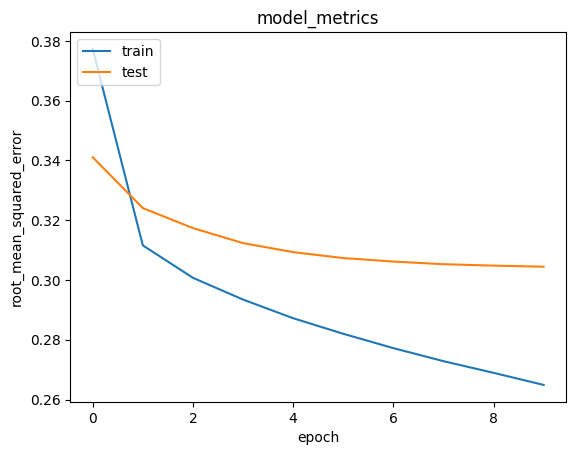

In [47]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train and Test Decrease: Early in training (epochs 0-2), the RMSE values ​​for both the train and test data decrease rapidly, indicating that the model is quickly learning patterns in the data. The small gap indicates that the model is doing quite well at generalizing, but a small gap remains, which could indicate minor overfitting. This graph shows that the recommendation system model experiences an increase in accuracy as the number of epochs increases, both on the train data which managed to reach an RMSE value of 0.2633 and the test which managed to reach an RMSE value of 0.3045.

## 7. Prediction

---
    
| ⚡ Description: Prediction ⚡ |
| :--------------------------- |
|In this section, it generates a number of products to be recommended to users.|

---

In [65]:
product_df = product_new
df = fix_product

# Mengambil sample user
user_id = df["User Id"].sample(43545).iloc[0]
product_visited_by_user = df[df["User Id"] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
product_not_visited = product_df[~product_df['product_id'].isin(product_visited_by_user.product_id.values)]['product_id']
product_not_visited = list(
    set(product_not_visited)
    .intersection(set(product_to_product_encoded.keys()))
)

product_not_visited = [[product_to_product_encoded.get(x)] for x in product_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_product_array = np.hstack(
    ([[user_encoder]] * len(product_not_visited), product_not_visited)
)

> To get product recommendations, we first take a random sample of users and define a variable product_not_bought which is a list of products that have never been visited by the user.

> The variable peoduct_not_visited is obtained by using the bitwise operator (~) on the variable product_bought_by_user.

In [66]:
ratings = model.predict(user_product_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_product_ids = [
    product_encoded_to_product.get(product_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('product with high ratings from user')
print('----' * 8)

top_product_user = (
    product_visited_by_user.sort_values(
        by = 'Rating',
        ascending=False
    )
    .head(5)
    .product_id.values
)

product_df_rows = product_df[product_df['product_id'].isin(top_product_user)]
for row in product_df_rows.itertuples():
    print(row.product_name, ':', row.category_name)

print('----' * 8)
print('Top 10 product recommendation')
print('----' * 8)

recommended_product = product_df[product_df['product_id'].isin(recommended_product_ids)]
for row in recommended_product.itertuples():
    print(row.product_name, ':', row.category_name)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Showing recommendations for users: A2EH9PA4PXX3E4
product with high ratings from user
--------------------------------
Mario Badescu Acne Facial Cleanser for Combination & Oily Skin, Oil-Free Face Wash with Salicylic Acid & Aloe Vera, Deep Pore Clean, 6 Fl Oz (Pack of 1) : Personal Care Products
Josie Maran 100% Pure Argan Oil (0.5oz) - Organic Moroccan Skin Growth Serum - Hydrating Anti-Aging Care : Skin Care Products
--------------------------------
Top 10 product recommendation
--------------------------------
Forte Skin Care- Super-Hydrating Hand, Face, and Body Moisturizer/Hypoallergenic Face Moisturizer for Dry and Cracked Skin/Gentle Moisturizing Cream Safe for Faces and Sensitive Skin / 4 oz : Skin Care Products
Tweezerman Baby Nail Scissors with Bear File (Color May Vary) : Baby Care Products
Basis Vitamin Bar Soap - Cleans and Softens with Vitamin C, E, and B5 – Use for Body Wash or Hand Soap – Pack of 6 Bars : Skin Care Products
Lava H

> Based on the output above, it can be seen that the recommendation results are quite good. Users give high ratings to the skin care and Personal Care product categories. Then, the recommendations given by the system are products in the skin care, Foot, Hand & Nail Care, Beauty Tools & Accessories, Hair Care, Health Care Products categories. All recommended products are still very related to the products given the highest rating by users.

# Save Model
In this section, the process of storing the model is carried out so that it can be applied to real projects such as applications

In [ ]:
model.save("model.h5")

In [ ]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

In [ ]:
# Convert model.h5 to model
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

# Export requirements.txt
This section will export the libraries used in this project in the form of a .txt file.

In [ ]:
pip freeze > requirements.txt